In [1]:
using Random, GMRF

include("src/dataGen.jl");
include("src/cavi.jl");
include("src/mcmc.jl");
include("src/plotting.jl");
include("src/evaluation.jl");

Taille de la grille (à ne pas modifier)

In [2]:
M₂ = 5;
M₁ = 5;
M = M₁ * M₂;

- Génération de la grille cible
- Création des données artificielles

In [3]:
Random.seed!(300);
Fmu = iGMRF(M₁, M₂, 1, 1);
Fphi = iGMRF(M₁, M₂, 1, 10);
gridTarget = generateTargetGrid(Fmu, Fphi);
gridTarget[:, :, 1] = gridTarget[:, :, 1] .+ 10.0;
gridTarget[:, :, 2] = gridTarget[:, :, 2] .+ 1.0;
gridTarget[:, :, 3] = gridTarget[:, :, 3];
nobs = 100;
data = generateData(gridTarget, nobs);

# CAVI

In [ ]:
nEpoch = 4;
epochSize = 5;

initialValues = Dict(
    :μ => zeros(M),
    :ϕ => zeros(M),
    :ξ => 0.0,
    :kappaUparam => ((M - 1) / 2 + 1) / 1,
    :kappaVparam => ((M - 1) / 2 + 1) / 1,
);

spatialScheme = Dict(
    :M => M,
    :Fmu => Fmu,
    :Fphi => Fphi,
    :data => data,
);

In [52]:
include("src/cavi.jl");

res = runCAVI(nEpoch, epochSize, initialValues, spatialScheme);

Itération 1...
Itération 2...
Itération 3...
Itération 4...
Itération 5...
Itération 6...
Itération 7...
Itération 8...
Itération 9...
Itération 10...
Itération 11...
Itération 12...
Itération 13...
Itération 14...
Itération 15...
Itération 16...
Itération 17...
Itération 18...
Itération 19...
Itération 20...
Itération 21...
Itération 22...
Itération 23...
Itération 24...
Itération 25...
Done ! :)


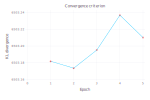

In [53]:
plotConvergenceCriterion(res.MCKL)

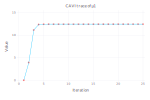

In [54]:
plotTraceCAVI(res.traces[:muMean][1, :], "μ1")

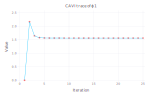

In [55]:
plotTraceCAVI(res.traces[:phiMean][1, :], "ϕ1")

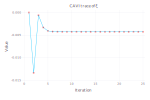

In [56]:
plotTraceCAVI(res.traces[:xiMean], "ξ")

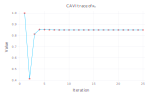

In [57]:
trace = res.traces[:kappaUparams][1, :] ./ res.traces[:kappaUparams][2, :];

plotTraceCAVI(trace, "κᵤ")

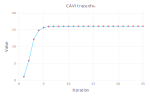

In [58]:
trace = res.traces[:kappaVparams][1, :] ./ res.traces[:kappaVparams][2, :];

plotTraceCAVI(trace, "κᵥ")

# MCMC

In [48]:
datastructure = Dict(
    :Y => data,
    :Fmu => Fmu,
    :Fphi => Fphi,
);

niter = 10000;

initialvalues = Dict(
    :μ => zeros(M),
    :ϕ => zeros(M),
    :ξ => .2,
    :κᵤ => 1.0,
    :κᵥ => 1.0,
);

stepsize = Dict(
    :μ => 1.3,
    :ϕ => .3,
    :ξ => .06,
);

In [49]:
include("src/mcmc.jl")

chain = mcmc(datastructure, niter, initialvalues, stepsize);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


In [50]:
changerate(chain)

             Change Rate
          μ1       0.357
          μ2       0.248
          μ3       0.255
          μ4       0.197
          μ5       0.190
          μ6       0.303
          μ7       0.244
          μ8       0.222
          μ9       0.211
         μ10       0.216
         μ11       0.269
         μ12       0.226
         μ13       0.239
         μ14       0.223
         μ15       0.240
         μ16       0.245
         μ17       0.219
         μ18       0.219
         μ19       0.216
         μ20       0.248
         μ21       0.191
         μ22       0.244
         μ23       0.200
         μ24       0.214
         μ25       0.244
          ϕ1       0.265
          ϕ2       0.275
          ϕ3       0.265
          ϕ4       0.273
          ϕ5       0.272
          ϕ6       0.269
          ϕ7       0.244
          ϕ8       0.260
          ϕ9       0.255
         ϕ10       0.272
         ϕ11       0.251
         ϕ12       0.251
         ϕ13       0.248
         ϕ14       0.254


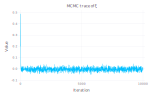

In [59]:
plotTraceMCMC(chain, "ξ")

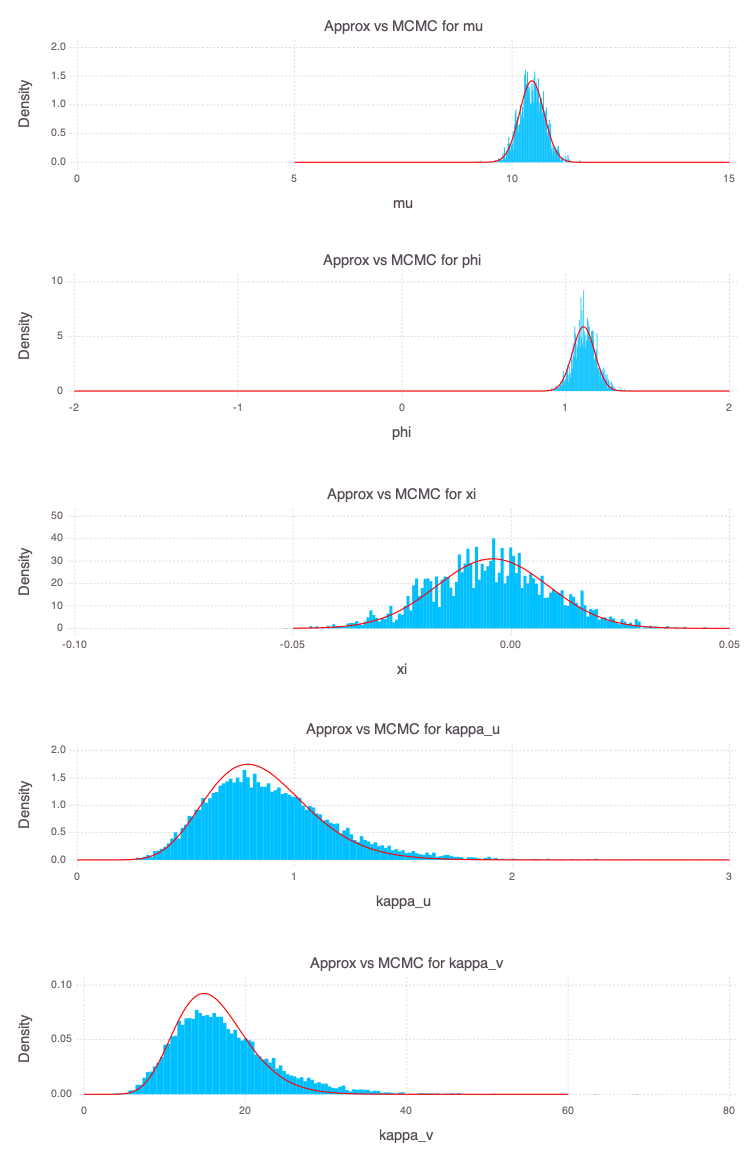

In [60]:
include("src/plotting.jl");

plotCAVIvsMCMC(3, caviRes=res, mcmcChain=chain, warmingSize=1000)

In [62]:
compDistance(res.traces, gridTarget)

1.2151680702065664

In [63]:
compDistance(chain, gridTarget, 1000)

1.2194121157667903